In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt
import scipy.stats as ss, scipy.integrate as integrate

In [2]:
df = pd.read_csv('data/policecalls2019.csv')
df

,CDTS,EID,START_DATE,CALL_NUMBER,PRIORITY,REPORT_DATE,OFFENSE_DATE,OFFENSE_TIME,CALLTYPE_CODE,CALL_TYPE,FINAL_DISPO_CODE,FINAL_DISPO,COMMON_PLACE_NAME,ADDRESS,CITY,STATE
0,20190101000812PS,7488585,14-MAY-21,P190010001,2,2019-01-01,2019-01-01,00:02:02,1057,FIREARMS DISCHARGED,CAN,Canceled,NaN,[1700]-[1800] BISCAYNE WY,San Jose,CA
1,20190101000318PS,7488586,14-MAY-21,P190010002,4,2019-01-01,2019-01-01,00:02:10,415FC,"DISTURBANCE, FIRECRACKERS",CAN,Canceled,NaN,HARWOOD RD & LOS GATOS-ALMADEN RD,San Jose,CA
2,20190101001247PS,7488587,14-MAY-21,P190010003,4,2019-01-01,2019-01-01,00:03:30,415FC,"DISTURBANCE, FIRECRACKERS",CAN,Canceled,THE GUN EXCHANGE,[2900]-[3000] ALMADEN EX,San Jose,CA
3,20190101000524PS,7488588,14-MAY-21,P190010004,2,2019-01-01,2019-01-01,00:03:31,415FC,"DISTURBANCE, FIRECRACKERS",N,No report required; dispatch record only,NaN,[500]-[600] SANDERS AV,San Jose,CA
4,20190101001240PS,7488589,14-MAY-21,P190010005,4,2019-01-01,2019-01-01,00:04:15,415FC,"DISTURBANCE, FIRECRACKERS",CAN,Canceled,NaN,[1700]-[1800] SAMSON CT,San Jose,CA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322623,20200101000920PS,7981557,14-MAY-21,P193650915,3,2019-12-31,2019-12-31,23:54:00,1033A,"ALARM, AUDIBLE",N,No report required; dispatch record only,NaN,[2500]-[2600] BRITT WY,San Jose,CA
322624,20200101010151PS,7981559,14-MAY-21,P193650916,4,2019-12-31,2019-12-31,23:56:27,22500,PARKING VIOLATION,N,No report required; dispatch record only,NaN,[100]-[200] S 24TH ST,San Jose,CA
322625,20200101000928PS,7981560,14-MAY-21,P193650917,2,2019-12-31,2019-12-31,23:57:03,415,DISTURBANCE,G,Gone on Arrival/unable to locate,DOERR PARK,NaN,San Jose,CA
322626,20200101003019PS,7981561,14-MAY-21,P193650918,4,2019-12-31,2019-12-31,23:58:33,22500,PARKING VIOLATION,CAN,Canceled,NaN,[13500]-[13600] HIGHWOOD DR,San Jose,CA


In [3]:
df_params = preprocess.preprocess(df, 2019)

arrests = df_params.loc[df_params['RESULT'] == 1]
arrest_count = arrests.shape[0]
not_arrests = df_params.loc[df_params['RESULT'] == 0]
not_arrest_count = not_arrests.shape[0]
arrest_mean, arrest_mode, arrest_std = arrests['PRIORITY'].mean(), arrests['PRIORITY'].mode()[0], arrests['PRIORITY'].std()
not_arrest_mean, not_arrest_mode, not_arrest_std = not_arrests['PRIORITY'].mean(), not_arrests['PRIORITY'].mode()[0], not_arrests['PRIORITY'].std()
print(f'''
    (where arrests is 'A' or 'B' or 'C')
    arrests:                        {arrest_count},
    not arrests:                 {not_arrest_count},
    max priority:                {df_params['PRIORITY'].max()}
    arrests priority mean: {arrest_mean}
    arrests priority mode: {arrest_mode}
    arrests priority std:      {arrest_std}
    not-arrests priority mean: {not_arrest_mean}
    not-arrests priority mode: {not_arrest_mode}
    not-arrests priority std:      {not_arrest_std}
''')
arrests


    (where arrests is 'A' or 'B' or 'C')
    arrests:                        14665,
    not arrests:                 307963,
    max priority:                6
    arrests priority mean: 3.714422093419707
    arrests priority mode: 2
    arrests priority std:      1.598724253724319
    not-arrests priority mean: 3.3339005010342153
    not-arrests priority mode: 3
    not-arrests priority std:      1.3832685926221375



/Users/gabrielruiz/DSProjects/python/police-calls/src/preprocess.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_params['OFFENSE_DAY'] = (pd.to_datetime(df['OFFENSE_DATE']) + pd.to_timedelta(df['OFFENSE_TIME']) -
/Users/gabrielruiz/DSProjects/python/police-calls/src/preprocess.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_params['RESULT'] = df['FINAL_DISPO_CODE'].apply(


,PRIORITY,CALLTYPE_CODE,OFFENSE_DAY,RESULT
244,5,23152,0.325625,1
261,4,602N,0.350752,1
323,5,23152,0.443565,1
328,3,484,0.450683,1
341,2,WELCK,0.466123,1
...,...,...,...,...
322476,2,23152,364.862697,1
322500,5,11300,364.894780,1
322531,3,422,364.927500,1
322588,3,3056,364.969618,1


In [4]:
not_arrests

,PRIORITY,CALLTYPE_CODE,OFFENSE_DAY,RESULT
0,2,1057,0.001412,0
1,4,415FC,0.001505,0
2,4,415FC,0.002431,0
3,2,415FC,0.002442,0
4,4,415FC,0.002951,0
...,...,...,...,...
322623,3,1033A,364.995833,0
322624,4,22500,364.997535,0
322625,2,415,364.997951,0
322626,4,22500,364.998993,0


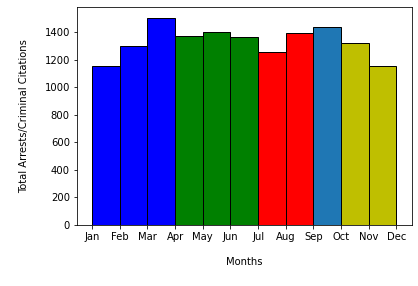

In [5]:
fig, ax = plt.subplots()
counts, bins, patches = plt.hist(arrests['OFFENSE_DAY'], bins=11, edgecolor="black")
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
for i in range(0, 3):
    patches[i].set_facecolor('b')
for i in range(3, 6):
    patches[i].set_facecolor('g')
for i in range(6, 8):
    patches[i].set_facecolor('r')
for i in range(9, 11):
    patches[i].set_facecolor('y')
ax.set_xticks(bins)
ax.set_xticklabels(months)
plt.xlabel('\nMonths\n')
plt.ylabel('\nTotal Arrests/Criminal Citations\n')
plt.show()
